# Задача 2.4

In [9]:
import numpy as np
import math as mth
import scipy.optimize as opt
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from __future__ import division

N = 10000
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Считаю эмпирическую ф-цию распределения

In [10]:
sample = sps.norm.rvs(size=N, loc=0, scale=1)

ecdf = list()
for n in np.arange(1, N+1):
    ecdf.append(ECDF(sample[:n]))

### Построение графиков

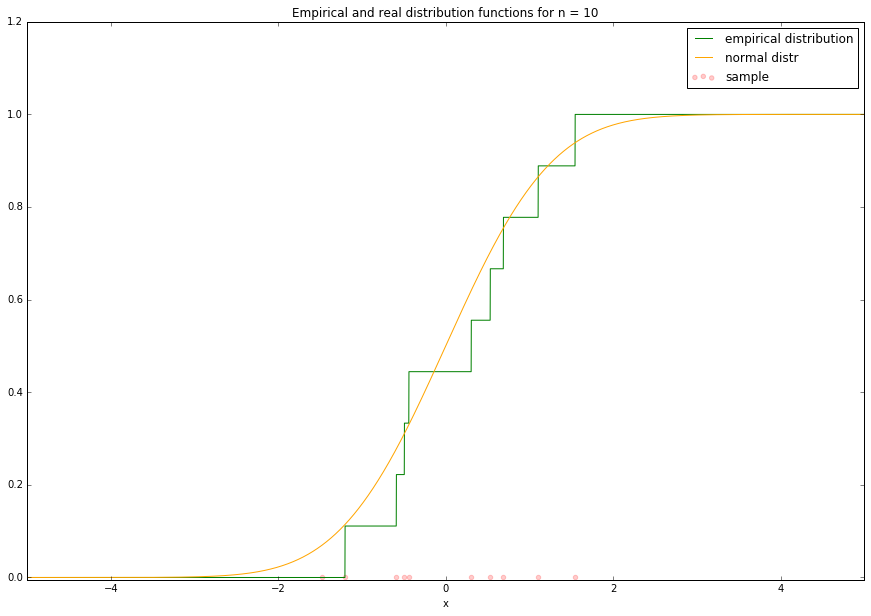

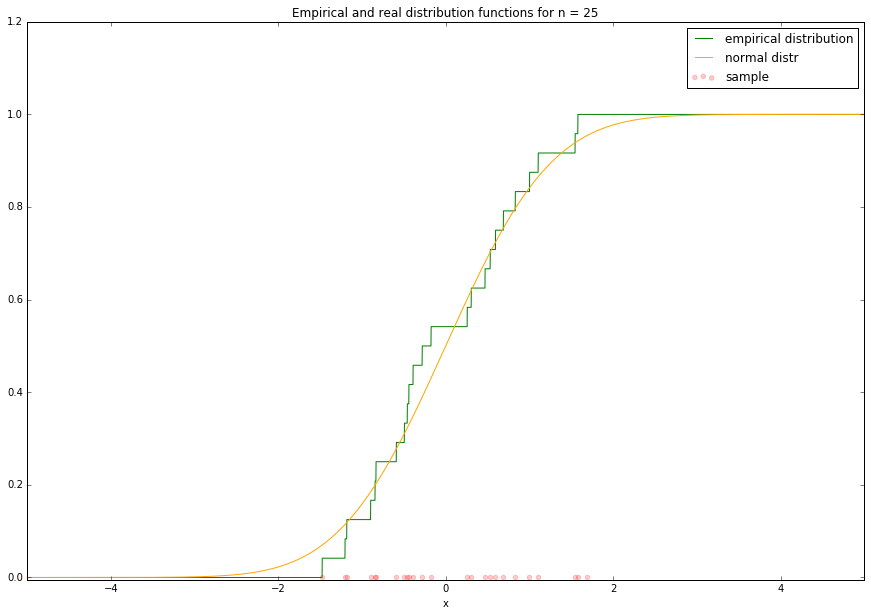

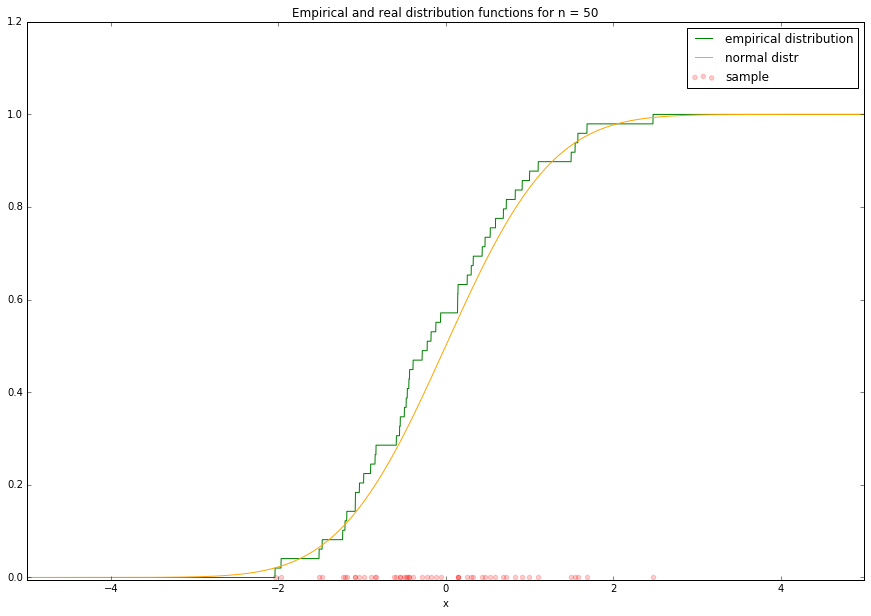

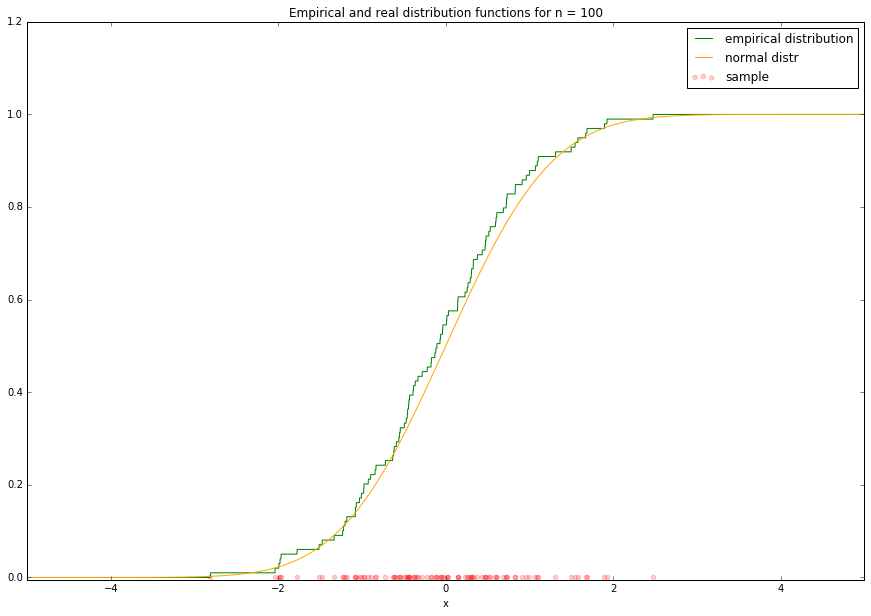

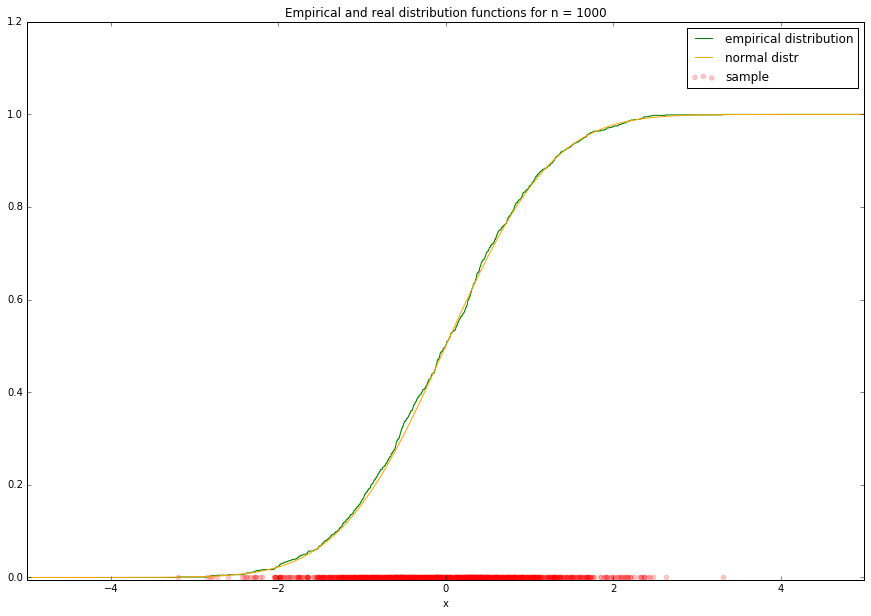

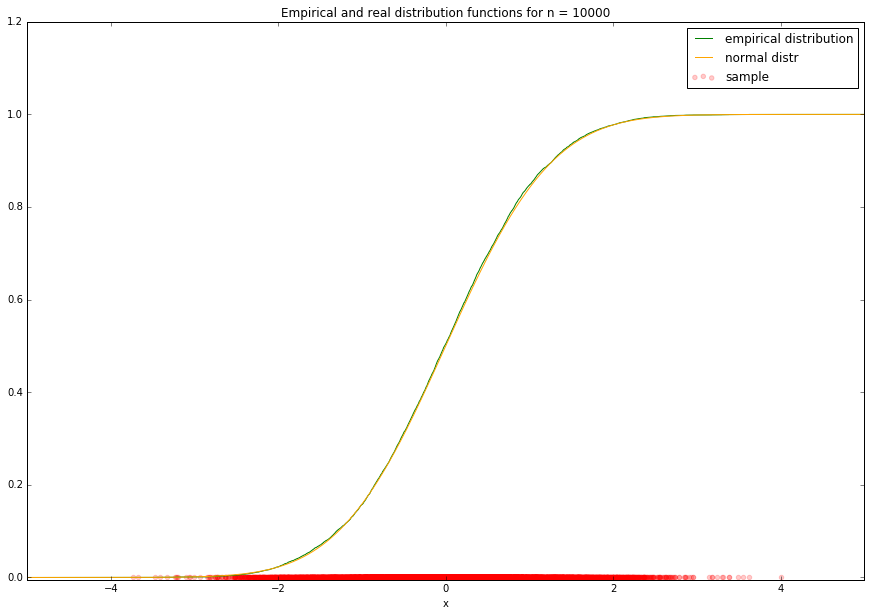

In [11]:
grid = np.linspace(-5, 5, N+1)
for n in [10, 25, 50, 100, 1000, N]:
    plt.figure(figsize=(15, 10))
    plt.plot(grid, ecdf[n-2](grid), color='green', linewidth=1, label='empirical distribution')
    plt.plot(grid, sps.norm.cdf(grid, loc=0, scale=1), color='orange', linewidth=1, label='normal distr')
    plt.scatter(sample[:n], np.zeros(n), color='red', alpha=0.2, label='sample')
    plt.legend()
    plt.title('Empirical and real distribution functions for n = '+str(n))
    plt.xlabel('x')
    plt.xlim((-5, 5))
    plt.ylim((-0.005, 1.2))
    plt.show()

### Считаю ф-цию $D_n$

Вообще лучше бы посчитать максимум по всем точкам излома(то есть выборки), но это невероятно долго работает, поэтому посчитаю чуть менее точно.

In [13]:
d = list()
for n in np.arange(1, N):
    d.append(max([abs(ecdf[n](x) - sps.norm.cdf(x)) for x in np.linspace(-3, 3, 60)]))

### Построение графика

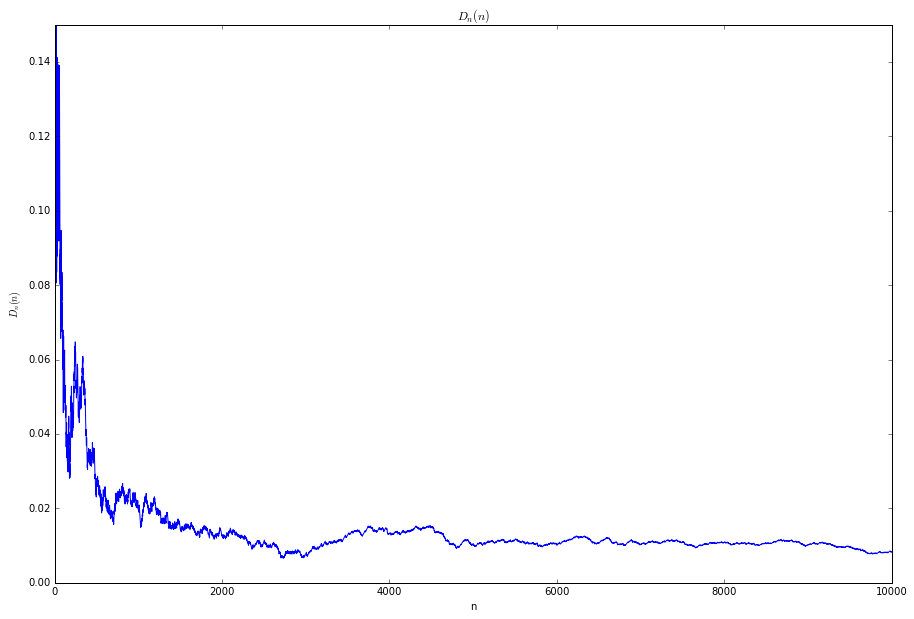

In [15]:
plt.figure(figsize=(15, 10))
plt.title(r'$D_n(n)$')
plt.plot(np.arange(1, N), d, color='blue', linewidth=1)
plt.xlabel('n')
plt.ylabel(r'$D_n(n)$')
plt.xlim((1, N))
plt.ylim((0, 0.15))
plt.show()